<a href="https://colab.research.google.com/github/AndroBuddy/cricket-data-set/blob/master/Score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AndroBuddy/cricket-data-set.git

Cloning into 'cricket-data-set'...
remote: Enumerating objects: 356, done.
remote: Counting objects: 100% (356/356), done.
remote: Compressing objects: 100% (346/346), done.
remote: Total 356 (delta 23), reused 334 (delta 10), pack-reused 0
Receiving objects: 100% (356/356), 10.25 MiB | 15.76 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import pandas as pd
import glob

path = r'/content/cricket-data-set/dataset' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    matches = pd.read_csv(filename, index_col=None, header=0)
    matches["total_runs"] = matches.runs_off_bat + matches.extras
    column = pd.unique(matches["batting_team"])
    df = matches.groupby(matches["batting_team"])
    try:
      df1 = df.get_group(column[0])
      df2 = df.get_group(column[1])

      df1["cumulative"] = df1["total_runs"].cumsum()
      df2["cumulative"] = df2["total_runs"].cumsum()

      matches = pd.concat([df1,df2])
      li.append(matches)
    except:
      print(filename)
      print("HELOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO") ## one of the files : 501265 has some error
      continue

matches = pd.concat(li, axis=0, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/content/cricket-data-set/dataset/501265.csv
HELOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


In [4]:
matches_copy = matches.copy()

In [5]:
matches_copy

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,cumulative
0,419132,2009/10,2010-03-30,Brabourne Stadium,1,0.1,Kings XI Punjab,Mumbai Indians,RS Bopara,SE Marsh,R McLaren,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,419132,2009/10,2010-03-30,Brabourne Stadium,1,0.2,Kings XI Punjab,Mumbai Indians,RS Bopara,SE Marsh,R McLaren,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,419132,2009/10,2010-03-30,Brabourne Stadium,1,0.3,Kings XI Punjab,Mumbai Indians,SE Marsh,RS Bopara,R McLaren,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,419132,2009/10,2010-03-30,Brabourne Stadium,1,0.4,Kings XI Punjab,Mumbai Indians,SE Marsh,RS Bopara,R McLaren,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,419132,2009/10,2010-03-30,Brabourne Stadium,1,0.5,Kings XI Punjab,Mumbai Indians,SE Marsh,RS Bopara,R McLaren,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75125,501256,2011,2011-05-14,Wankhede Stadium,2,19.4,Mumbai Indians,Deccan Chargers,KA Pollard,Harbhajan Singh,Anand Rajan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,123
75126,501256,2011,2011-05-14,Wankhede Stadium,2,19.5,Mumbai Indians,Deccan Chargers,KA Pollard,Harbhajan Singh,Anand Rajan,0,0,NaN,NaN,NaN,NaN,NaN,caught,KA Pollard,NaN,NaN,0,123
75127,501256,2011,2011-05-14,Wankhede Stadium,2,19.6,Mumbai Indians,Deccan Chargers,Harbhajan Singh,SL Malinga,Anand Rajan,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,124
75128,501256,2011,2011-05-14,Wankhede Stadium,2,19.7,Mumbai Indians,Deccan Chargers,Harbhajan Singh,SL Malinga,Anand Rajan,1,0,NaN,NaN,NaN,NaN,NaN,run out,SL Malinga,NaN,NaN,1,125


In [6]:
matches.season.iloc[0]

'2009/10'

In [7]:
matches  = matches.drop(columns = ["season" , "match_id" , "start_date" , "wicket_type" , "player_dismissed" , "other_wicket_type" , "other_player_dismissed"])

In [8]:
matches  = matches.drop(columns = ["runs_off_bat" , "extras" , "wides" , "noballs" , "byes" , "legbyes" , "penalty"])

In [9]:
matches.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'total_runs', 'cumulative'],
      dtype='object')

In [10]:
pd.unique(matches["venue"])

array(['Brabourne Stadium', 'Dr DY Patil Sports Academy',
       'OUTsurance Oval', 'Wankhede Stadium',
       'Rajiv Gandhi International Stadium',
       'Punjab Cricket Association Stadium, Mohali', "St George's Park",
       'MA Chidambaram Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Eden Gardens', 'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium', 'Kingsmead', 'Buffalo Park',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla',
       'Sawai Mansingh Stadium', 'New Wanderers Stadium', 'Newlands',
       'Barabati Stadium', 'SuperSport Park',
       'Sardar Patel Stadium, Motera', 'Holkar Cricket Stadium',
       'Nehru Stadium', 'De Beers Diamond Oval'], dtype=object)

In [11]:
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [12]:
matches = matches[(matches['batting_team'].isin(current_teams)) & (matches['bowling_team'].isin(current_teams))]

In [13]:
pd.unique(matches["batting_team"])

array(['Kings XI Punjab', 'Mumbai Indians', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Chennai Super Kings'], dtype=object)

In [14]:
matches.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'total_runs', 'cumulative'],
      dtype='object')

In [15]:
##Un comment only if you need to use a new Label Encoder
## Since we already have saved the encoders , we will use those.

# venue_encoder = LabelEncoder()
# matches["venue"] = venue_encoder.fit_transform(matches["venue"])
# batting_team_encoder = LabelEncoder()
# matches["batting_team"] = batting_team_encoder.fit_transform(matches["batting_team"])
# bowling_team_encoder = LabelEncoder()
# matches["bowling_team"] = bowling_team_encoder.fit_transform(matches["bowling_team"])
# striker_encoder = LabelEncoder()
# matches["striker"] = striker_encoder.fit_transform(matches["striker"])
# non_striker_encoder = LabelEncoder()
# matches["non_striker"] = non_striker_encoder.fit_transform(matches["non_striker"])
# bowler_encoder = LabelEncoder()
# matches["bowler"] = bowler_encoder.fit_transform(matches["bowler"])

In [16]:
## Loading the preloaded encoders

import joblib

with open("/content/cricket-data-set/LabelEncoder Files/venue_encoder.joblib" , "rb" ) as f:
  venue_encoder = joblib.load(f)

with open("/content/cricket-data-set/LabelEncoder Files/batting_team_encoder.joblib" , "rb" ) as f:
  batting_team_encoder = joblib.load(f)


with open("/content/cricket-data-set/LabelEncoder Files/bowling_team_encoder.joblib" , "rb" ) as f:
  bowling_team_encoder = joblib.load(f)

with open("/content/cricket-data-set/LabelEncoder Files/striker_encoder .joblib" , "rb" ) as f:
  striker_encoder = joblib.load(f)


with open("/content/cricket-data-set/LabelEncoder Files/non_striker_encoder .joblib" , "rb" ) as f:
  non_striker_encoder  = joblib.load(f)


with open("/content/cricket-data-set/LabelEncoder Files/bowler_encoder.joblib" , "rb" ) as f:
  bowler_encoder = joblib.load(f)




matches["venue"] = venue_encoder.transform(matches["venue"])
matches["batting_team"] = batting_team_encoder.transform(matches["batting_team"])
matches["bowling_team"] = bowling_team_encoder.transform(matches["bowling_team"])
matches["striker"] = striker_encoder.transform(matches["striker"])
matches["non_striker"] = non_striker_encoder.transform(matches["non_striker"])
matches["bowler"] = bowler_encoder.transform(matches["bowler"])

In [17]:
matches.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'total_runs', 'cumulative'],
      dtype='object')

In [18]:
matches_copy['count'] = 1
matches_copy.groupby(['venue']).count()['count']

venue
Barabati Stadium                                        973
Brabourne Stadium                                      1720
Buffalo Park                                            715
De Beers Diamond Oval                                   726
Dr DY Patil Sports Academy                             3993
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     476
Eden Gardens                                           6451
Feroz Shah Kotla                                       6160
Himachal Pradesh Cricket Association Stadium           1673
Holkar Cricket Stadium                                  408
Kingsmead                                              3643
M Chinnaswamy Stadium                                  6398
MA Chidambaram Stadium                        8050
Nehru Stadium                                          1155
New Wanderers Stadium                                  1940
Newlands                                               1539
OUTsurance Oval                            

In [19]:
matches.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'total_runs', 'cumulative'],
      dtype='object')

In [20]:
matches = matches[matches["ball"] < 6]

In [21]:
##Standardisation

# matches["venue"] = matches["venue"] / max(matches["venue"])
# # matches["ball"] = matches["ball"] / 6
# matches["batting_team"] = matches_copy["batting_team"] / max(matches["batting_team"])
# matches["bowling_team"] = matches["bowling_team"] / max(matches["bowling_team"])
# matches["striker"] = matches["striker"] / max(matches["striker"])
# matches["non_striker"] = matches["non_striker"] / max(matches["non_striker"])
# # matches["cumulative"] = matches["cumulative"] / max(matches["cumulative"])

In [22]:
matches_copy[matches_copy["ball"] < 6]["cumulative"]

34       47
162      43
287      27
399      32
485      37
         ..
74568    42
74670    50
74793    29
74915    31
75037    26
Name: cumulative, Length: 630, dtype: int64

In [23]:
# matches[matches_copy["ball"] == 5.5]["cumulative"]*246

In [24]:
# features = ["venue" , "innings" , "ball" , "batting_team" , "bowling_team" , "striker" , "non_striker" , "bowler" , "total_runs" , "cumulative"]
# features = ["venue" , "innings" , "ball" , "batting_team" , "bowling_team"]


features = ["innings" , "ball" , "striker" , "bowler" , "non_striker"]


features = ["ball" , "striker" , "bowler" , "non_striker" , "total_runs"]


features = ["innings" , "ball" , "striker" , "bowler" , "non_striker" , "total_runs"]


features = ["innings" , "ball" , "batting_team" , "bowling_team" , "striker" , "bowler"]


features = ["venue" , "innings" , "ball" , "batting_team" , "bowling_team" , "striker" , "non_striker" , "bowler" , "total_runs"]


# features = ["innings" , "ball" , "striker" , "bowler" , "non_striker"]


# features = ["innings" , "ball" , "striker" , "bowler" , "non_striker"]



# features = [ "innings" , "ball" , "total_runs"]

In [ ]:
## venue , first 6 strikers , first 6 bowlers , Betting team and bowling team

In [25]:
x_train, x_test, y_train, y_test = train_test_split(matches[features] , matches["cumulative"], test_size=0.2, random_state=0)

In [26]:
#__Random forest regressor__
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# random_grid = {'n_estimators': [400], 
#                'max_features': max_features,
#                'max_depth': [10], 
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}



print(random_grid)

from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 400, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

print(rf_random.best_params_)
prediction = rf_random.predict(x_test)

{'n_estimators': [1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 36 is smaller than n_iter=400. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  8.9min finished


{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [27]:
##XGBoost

from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 25, alpha = 10, n_estimators = 4000)
xgb.fit(x_train , y_train)
xgb_prediction = xgb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
MAE: 5.407279157220625
MSE: 53.71031091616135
RMSE: 7.328731876399992


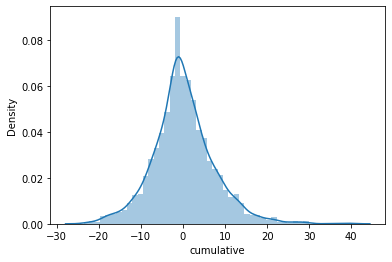

In [28]:
from sklearn import metrics

print(sns.distplot(y_test-prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
MAE: 5.340317686764615
MSE: 50.896653254029175
RMSE: 7.134189039689737


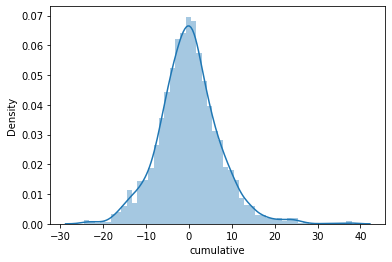

In [29]:
print(sns.distplot(y_test-xgb_prediction))
print('MAE:', metrics.mean_absolute_error(y_test, xgb_prediction))
print('MSE:', metrics.mean_squared_error(y_test, xgb_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction)))

In [30]:
from sklearn.metrics import r2_score
print(r2_score(y_test , prediction))
print(r2_score(y_test , xgb_prediction))

0.7918875097356944
0.8027896492472604


In [31]:
import joblib

In [37]:
joblib.dump(rf_random , "FewFeaturesRandomForest(79).joblib")
joblib.dump(xgb , "XGB(80).joblib")


# joblib.dump(venue_encoder , "venue_encoder.joblib")
# joblib.dump(batting_team_encoder , "batting_team_encoder.joblib")
# joblib.dump(bowling_team_encoder , "bowling_team_encoder.joblib")
# joblib.dump(striker_encoder , "striker_encoder .joblib")
# joblib.dump(bowler_encoder , "bowler_encoder.joblib")
# joblib.dump(non_striker_encoder , "non_striker_encoder .joblib")

['XGB(80).joblib']

In [33]:
prediction = rf_random.predict(x_test)

In [34]:
x_test1 = x_test.reset_index(drop = True , inplace = True)

In [35]:
x_test

,venue,innings,ball,striker
0,4,1,3.1,80
1,16,1,0.7,238
2,4,1,2.6,235
3,11,1,4.5,110
4,16,1,4.2,128
...,...,...,...,...
3091,7,1,0.5,261
3092,4,1,1.6,154
3093,15,1,2.5,179
3094,11,1,0.6,110


In [46]:
data = np.array([19, 1 , 5.5 , 222])
rf_random.predict(data.reshape(1 , -1))

array([36.56003447])

In [44]:
matches[matches["ball"] == 5.5].head(100)

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,total_runs,cumulative
34,0,1,5.5,2,4,71,222,68,0,47
162,0,2,5.5,4,2,205,110,123,1,43
485,12,1,5.5,1,2,16,253,153,4,37
613,12,2,5.5,2,1,113,275,107,1,36
732,19,1,5.5,2,4,222,125,195,0,37
...,...,...,...,...,...,...,...,...,...,...
16109,19,2,5.5,1,4,108,269,59,4,22
16969,4,1,5.5,3,4,66,198,53,0,40
17096,4,2,5.5,4,3,65,199,70,4,38
17460,15,1,5.5,5,6,214,81,117,1,50


In [ ]:
# mid,       date,       venue,       bat_team,       bowl_team,      batsman,          bowler,         runs,     wickets,          overs,        runs_last_5,           wickets_last_5,            striker,             non-striker,               total

In [ ]:
# 1,       2008-04-18,   M Chin ,    Kolkata Kni,   Royal Challen B,   SC Ganguly,      P Kumar,                        1,         0,               0.1,              1,                      0,                      0,                     0,                         222